### Key DataTypes in Python

###### Text Type: 'str' -  <span style='color:green'>  
>    <span style='color:green'> Example - City = 'Bangalore </span>
###### Numeric Types: <span style='color:green'>  
>    <span style='color:green'> Example - Age = 35 </span>
###### Sequence Types:	list, tuple, range 
>    <span style='color:green'> Example - List = [3,25,78] </span>    >> Mutable
>>    <span style='color:green'> Example - Tuple = (3,25,78) </span>
>>>   <span style='color:green'> Example - Range = range() </span>
###### Mapping Type:	dict 
> <span style='color:green'> Capitals = {"USA":"Washington DC", "France":"Paris", "India":"New Delhi"} </span>
###### Set Types:	set
> <span style='color:green'> thisset = {"apple", "banana", "cherry", "apple"} </span> >> Unordered, unindexed & No duplicate.
###### Boolean Type:	bool 
> <span style='color:green'> True/Flase </span>

***__________________________________________________***

**Range Function in Python:**
https://www.geeksforgeeks.org/python-range-function/

## Series in Python

In [2]:
import pandas as pd
# simple list/array
data = [1, 2, 3, 4]
type(data)

list

In [3]:
ser = pd.Series(data)
print(ser)

0    1
1    2
2    3
3    4
dtype: int64


In [4]:
type(ser)

pandas.core.series.Series

In [21]:
# creating a series
data1 = [7, 8, 9, 10]
data2 = ['a','b','c','d']
ser1 = pd.Series(data1, index=data2)
ser1

a     7
b     8
c     9
d    10
dtype: int64

In [14]:
type(ser1)
ser1.index
ser1.values

array([1, 2, 3, 4], dtype=int64)

In [20]:
pd.DataFrame(ser1)

,0
a,7
b,8
c,9
d,10


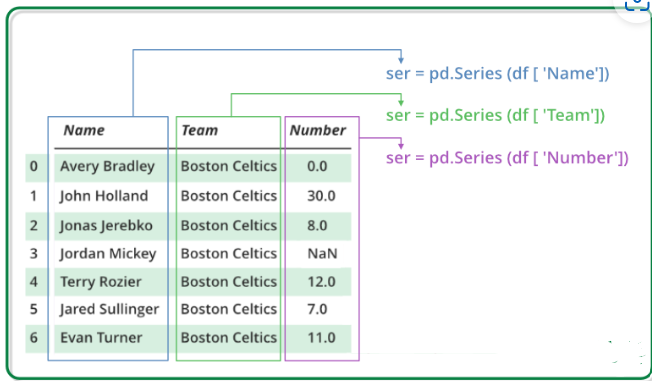

## Create dataframe from dictonary.

In [23]:
studentData = {
    'name' : ['jack', 'Riti', 'Aadi'],
    'age' : [34, 30, 16],
    'city' : ['Sydney', 'Delhi', 'New york']
}

In [24]:
studentData

{'name': ['jack', 'Riti', 'Aadi'],
 'age': [34, 30, 16],
 'city': ['Sydney', 'Delhi', 'New york']}

In [27]:
type(studentData)

dict

In [28]:
studentData.keys()

dict_keys(['name', 'age', 'city'])

In [29]:
studentData.values()

dict_values([['jack', 'Riti', 'Aadi'], [34, 30, 16], ['Sydney', 'Delhi', 'New york']])

In [34]:
df = pd.DataFrame(studentData,index=['a','b','c'])
df

,name,age,city
a,jack,34,Sydney
b,Riti,30,Delhi
c,Aadi,16,New york


In [36]:
df.index

Index(['a', 'b', 'c'], dtype='object')

### | Joins

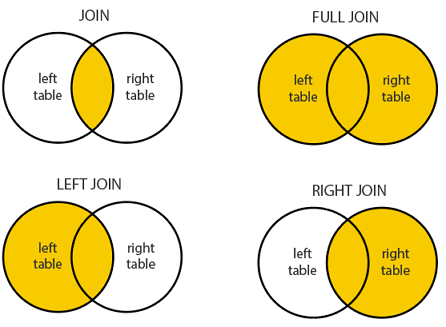

### Merging DataSets in Python


##### merge(): To combine the datasets on common column or index or both.
##### concat(): To combine the datasets across rows or columns.
##### join(): To combine the datasets on key column or index.

In [61]:
import pandas as pd

df1 = pd.read_excel("Dummy_course_data.xlsx",sheet_name="Fees")
df2 = pd.read_excel("Dummy_course_data.xlsx",sheet_name="Discounts")

In [40]:
df1

,Course,Country,Fee_USD
0,Maths,India,15500
1,Physics,Germany,16700
2,Applied Maths,Germany,11100
3,General Science,United Kingdom,18000
4,Social Science,Austria,18400
5,History,Poland,23000
6,Politics,India,21600
7,Computer Graphics,United States,27000


In [41]:
df2

,Course,Country,Discount_USD
0,Maths,India,1000
1,Physics,Germany,2300
2,German language,Germany,1500
3,Information Technology,United Kingdom,1200
4,Social Science,Austria,1500
5,History,Poland,3200
6,Marketing,India,2000
7,Computer Graphics,United States,2500


In [94]:
! pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26768 sha256=01c9c901f4181feaeaef7599641456884843c9af0be9dfc649fa6981b3104f41
  Stored in directory: c:\users\gaugupta19\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


## Merging two dataset.

In [95]:
import pandasql as ps

In [97]:
print(df1.columns,df2.columns)

Index(['Course', 'Country', 'Fee_USD'], dtype='object') Index(['Course', 'Country', 'Discount_USD'], dtype='object')


In [112]:
#### SQL to inner join 2 datasets.
ps.sqldf("select * from df1 inner join df2 on df1.Course = df2.Course and df1.Country = df2.Country")

,Course,Country,Fee_USD,Course,Country,Discount_USD
0,Maths,India,15500,Maths,India,1000
1,Physics,Germany,16700,Physics,Germany,2300
2,Social Science,Austria,18400,Social Science,Austria,1500
3,History,Poland,23000,History,Poland,3200
4,Computer Graphics,United States,27000,Computer Graphics,United States,2500


In [111]:
#### Merge these datasets using python.
pd.merge(df1, df2, how='inner', on=['Course','Country'])

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500,1000
1,Physics,Germany,16700,2300
2,Social Science,Austria,18400,1500
3,History,Poland,23000,3200
4,Computer Graphics,United States,27000,2500


In [113]:
pd.merge(df1, df2, how='inner')

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500,1000
1,Physics,Germany,16700,2300
2,Social Science,Austria,18400,1500
3,History,Poland,23000,3200
4,Computer Graphics,United States,27000,2500


In [115]:
pd.merge(df1,df2)

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500,1000
1,Physics,Germany,16700,2300
2,Social Science,Austria,18400,1500
3,History,Poland,23000,3200
4,Computer Graphics,United States,27000,2500


### | how = ‘left’

In [50]:
pd.merge(df1, df2, how='left')

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500,1000.0
1,Physics,Germany,16700,2300.0
2,Applied Maths,Germany,11100,NaN
3,General Science,United Kingdom,18000,NaN
4,Social Science,Austria,18400,1500.0
5,History,Poland,23000,3200.0
6,Politics,India,21600,NaN
7,Computer Graphics,United States,27000,2500.0


### | how = ‘right’

In [51]:
pd.merge(df1, df2, how='right')

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500.0,1000
1,Physics,Germany,16700.0,2300
2,German language,Germany,NaN,1500
3,Information Technology,United Kingdom,NaN,1200
4,Social Science,Austria,18400.0,1500
5,History,Poland,23000.0,3200
6,Marketing,India,NaN,2000
7,Computer Graphics,United States,27000.0,2500


### | how = ‘outer’

In [52]:
pd.merge(df1, df2, how='outer')

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500.0,1000.0
1,Physics,Germany,16700.0,2300.0
2,Applied Maths,Germany,11100.0,NaN
3,General Science,United Kingdom,18000.0,NaN
4,Social Science,Austria,18400.0,1500.0
5,History,Poland,23000.0,3200.0
6,Politics,India,21600.0,NaN
7,Computer Graphics,United States,27000.0,2500.0
8,German language,Germany,NaN,1500.0
9,Information Technology,United Kingdom,NaN,1200.0


### |  joining of datasets

In [78]:
#### Set index for both dataset.
df11 = df1.set_index(['Course'])
df22 = df2.set_index(['Course'])

In [89]:
#### This is a left join by default.
df11.join(df22,lsuffix = '_df1',rsuffix = '_df2', on='Course')

,Country_df1,Fee_USD,Country_df2,Discount_USD
Course,,,,
Maths,India,15500,India,1000.0
Physics,Germany,16700,Germany,2300.0
Applied Maths,Germany,11100,NaN,NaN
General Science,United Kingdom,18000,NaN,NaN
Social Science,Austria,18400,Austria,1500.0
History,Poland,23000,Poland,3200.0
Politics,India,21600,NaN,NaN
Computer Graphics,United States,27000,United States,2500.0


In [91]:
#### It will also work without on options.
df11.join(df22,lsuffix = '_df1',rsuffix = '_df2')

,Country_df1,Fee_USD,Country_df2,Discount_USD
Course,,,,
Maths,India,15500,India,1000.0
Physics,Germany,16700,Germany,2300.0
Applied Maths,Germany,11100,NaN,NaN
General Science,United Kingdom,18000,NaN,NaN
Social Science,Austria,18400,Austria,1500.0
History,Poland,23000,Poland,3200.0
Politics,India,21600,NaN,NaN
Computer Graphics,United States,27000,United States,2500.0


In [ ]:
df11.join(df22, on='Course',lsuffix = '_df1',rsuffix = '_df2')

In [92]:
##### Inner join will also work over here.
df11.join(df22, lsuffix = '_df1',rsuffix = '_df2', on='Course',how='inner')

,Country_df1,Fee_USD,Country_df2,Discount_USD
Course,,,,
Maths,India,15500,India,1000
Physics,Germany,16700,Germany,2300
Social Science,Austria,18400,Austria,1500
History,Poland,23000,Poland,3200
Computer Graphics,United States,27000,United States,2500


### Concatination 

In [118]:
#### Direct concatinaion
pd.concat([df1,df2])

,Course,Country,Fee_USD,Discount_USD
0,Maths,India,15500.0,NaN
1,Physics,Germany,16700.0,NaN
2,Applied Maths,Germany,11100.0,NaN
3,General Science,United Kingdom,18000.0,NaN
4,Social Science,Austria,18400.0,NaN
5,History,Poland,23000.0,NaN
6,Politics,India,21600.0,NaN
7,Computer Graphics,United States,27000.0,NaN
0,Maths,India,NaN,1000.0
1,Physics,Germany,NaN,2300.0


In [119]:
#### Direct concatinaion
pd.concat([df1,df2],axis=1)

,Course,Country,Fee_USD,Course,Country,Discount_USD
0,Maths,India,15500,Maths,India,1000
1,Physics,Germany,16700,Physics,Germany,2300
2,Applied Maths,Germany,11100,German language,Germany,1500
3,General Science,United Kingdom,18000,Information Technology,United Kingdom,1200
4,Social Science,Austria,18400,Social Science,Austria,1500
5,History,Poland,23000,History,Poland,3200
6,Politics,India,21600,Marketing,India,2000
7,Computer Graphics,United States,27000,Computer Graphics,United States,2500


In [122]:
df_app = df11.append(df22)
display(df_app)

C:\Users\gaugupta19\AppData\Local\Temp\ipykernel_16600\1140602892.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_app = df11.append(df22)


,Country,Fee_USD,Discount_USD
Course,,,
Maths,India,15500.0,NaN
Physics,Germany,16700.0,NaN
Applied Maths,Germany,11100.0,NaN
General Science,United Kingdom,18000.0,NaN
Social Science,Austria,18400.0,NaN
History,Poland,23000.0,NaN
Politics,India,21600.0,NaN
Computer Graphics,United States,27000.0,NaN
Maths,India,NaN,1000.0


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<span style='color:blue'> ***Merge*** >> </span>
##### 1. By default Join happens on common column.
##### 2. Inexing not required for the joins.

<span style='color:blue'> ***Join*** >> </span>

##### 1. Index is required to join the datasets. 
##### 2. By default join happens on index.
***
<span style='color:blue'> 
Conclusion - Join works well when you have the common indexes, and merge work well with the data without indexes.
</span>
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++